In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

# Setup

In [2]:
model = BabyMAKROModelClass(name='baseline') # create an instance of the model

par = model.par
ss = model.ss
paramesol = model.sol

In [3]:
parameter = 'Lambda'
parvalues = [0.,0.25,0.5]
ModelList = model.multi_model(parameter,parvalues)

Jacobian calculated in 1.0 mins 6 secs
Jacobian calculated in 30.1 secs
Jacobian calculated in 30.1 secs


# Find IRF

In [4]:
Tshock = 50
persistence = 0.80**np.arange(Tshock)

for i in range(len(ModelList)):
    ModelList[i].set_exo_ss()
    ModelList[i].set_unknowns_ss()

    shock = 0.01*ModelList[i].ss.Gamma
    ModelList[i].sol.Gamma[:Tshock] = ModelList[i].ss.Gamma + shock*persistence

    ModelList[i].find_IRF()


initial:
   max. abs. error = 8.01e-01
    1.68e-14 in A_R_ini_error
    4.40e-14 in Aq_diff
    1.43e-03 in bargaining_cond
    4.44e-16 in FOC_capital_agency
    1.15e-14 in FOC_K_ell
    8.01e-01 in mkt_clearing
    9.90e-03 in PC

it = 0
 solve: t1-t0 = 0.1 secs
   max. abs. error = 8.01e-01
    7.24e-05 in A_R_ini_error
    3.37e-06 in Aq_diff
    1.41e-05 in bargaining_cond
    1.63e-05 in FOC_capital_agency
    6.45e-04 in FOC_K_ell
    9.15e-03 in mkt_clearing
    1.78e-04 in PC
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.1 secs
   max. abs. error = 9.15e-03
    7.07e-07 in A_R_ini_error
    6.40e-08 in Aq_diff
    2.05e-07 in bargaining_cond
    8.68e-07 in FOC_capital_agency
    1.31e-05 in FOC_K_ell
    2.15e-04 in mkt_clearing
    2.88e-06 in PC
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 2
 solve: t1-t0 = 0.1 secs
   max. abs. error = 2.15e-04
    1.31e-08 in A_R_ini_error
    6.83e-10 in Aq_diff
    3.13e-09 in b

## Figures

### Long view

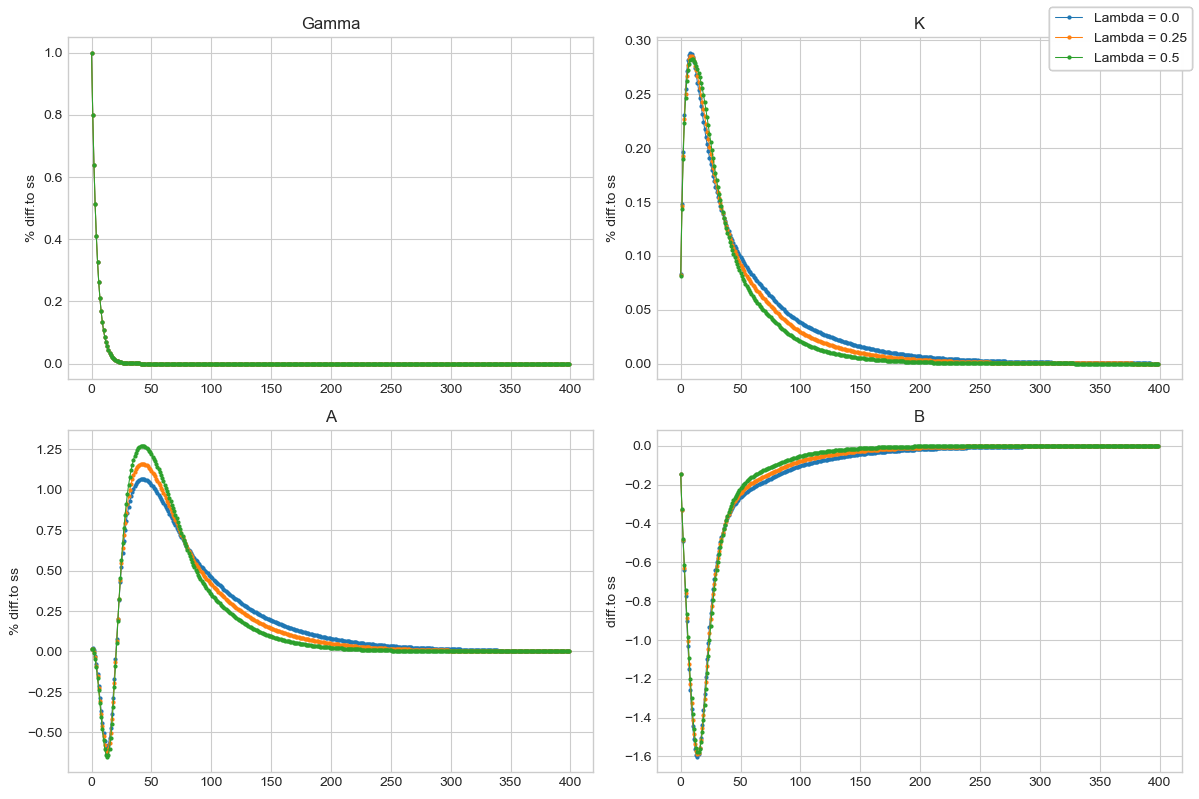

In [5]:
model.plot_IRF_models(ModelList,varlist=['Gamma','K','A','B'],T_IRF=par.T,ncol=2,parameter=parameter,parvalues=parvalues)

### National accouting - quantities

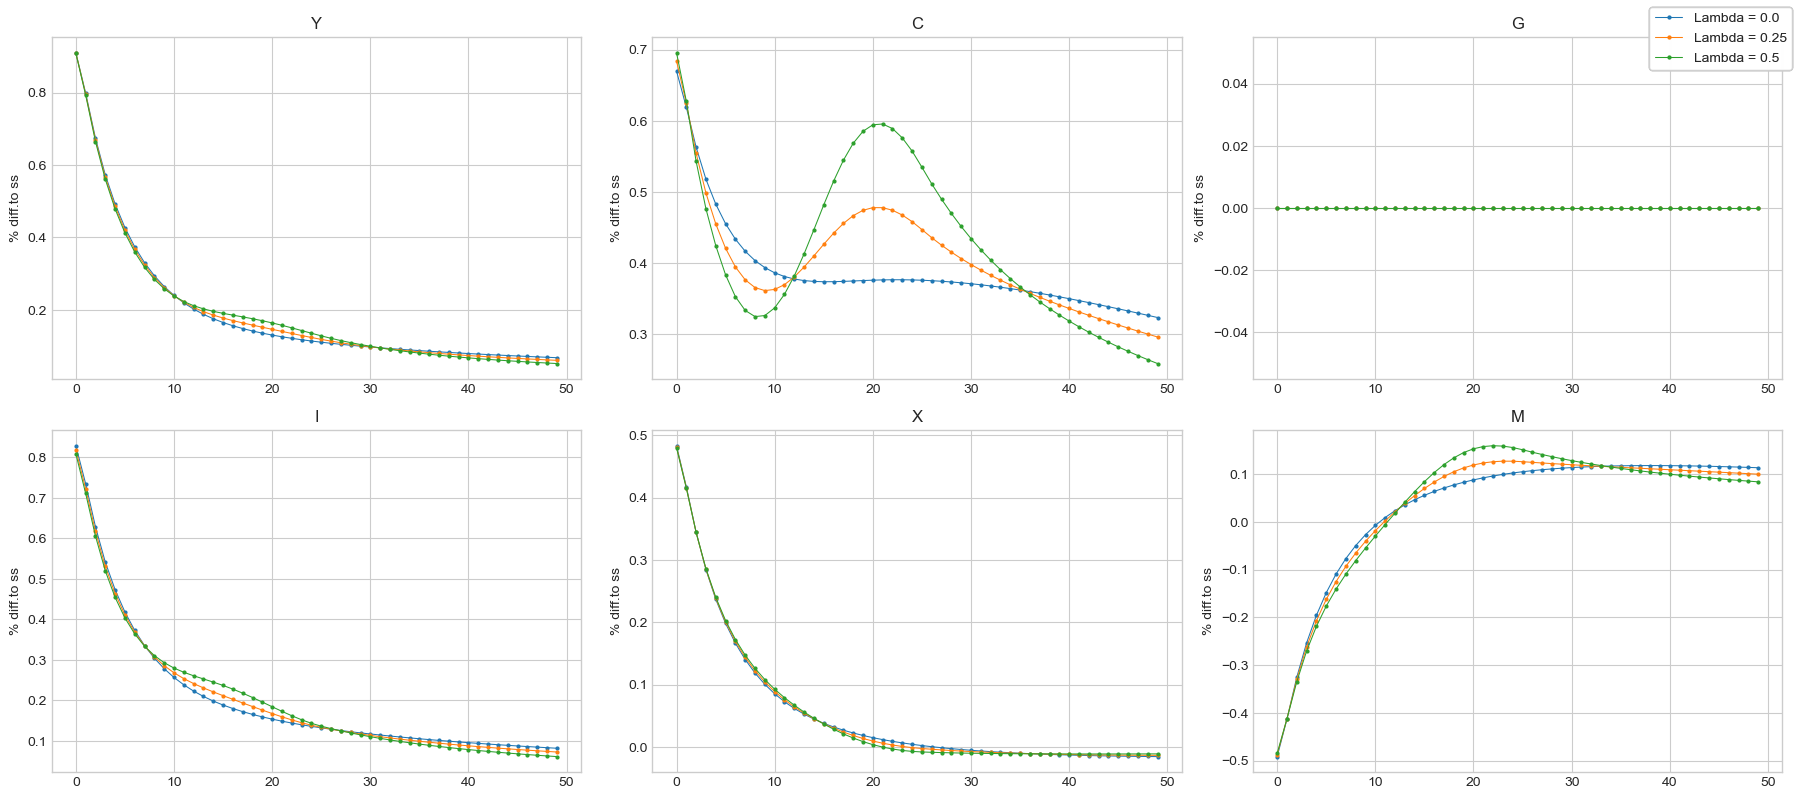

In [6]:
model.plot_IRF_models(ModelList,varlist=['Y','C','G','I','X','M'],parameter=parameter,parvalues=parvalues)

### National accouting - prices

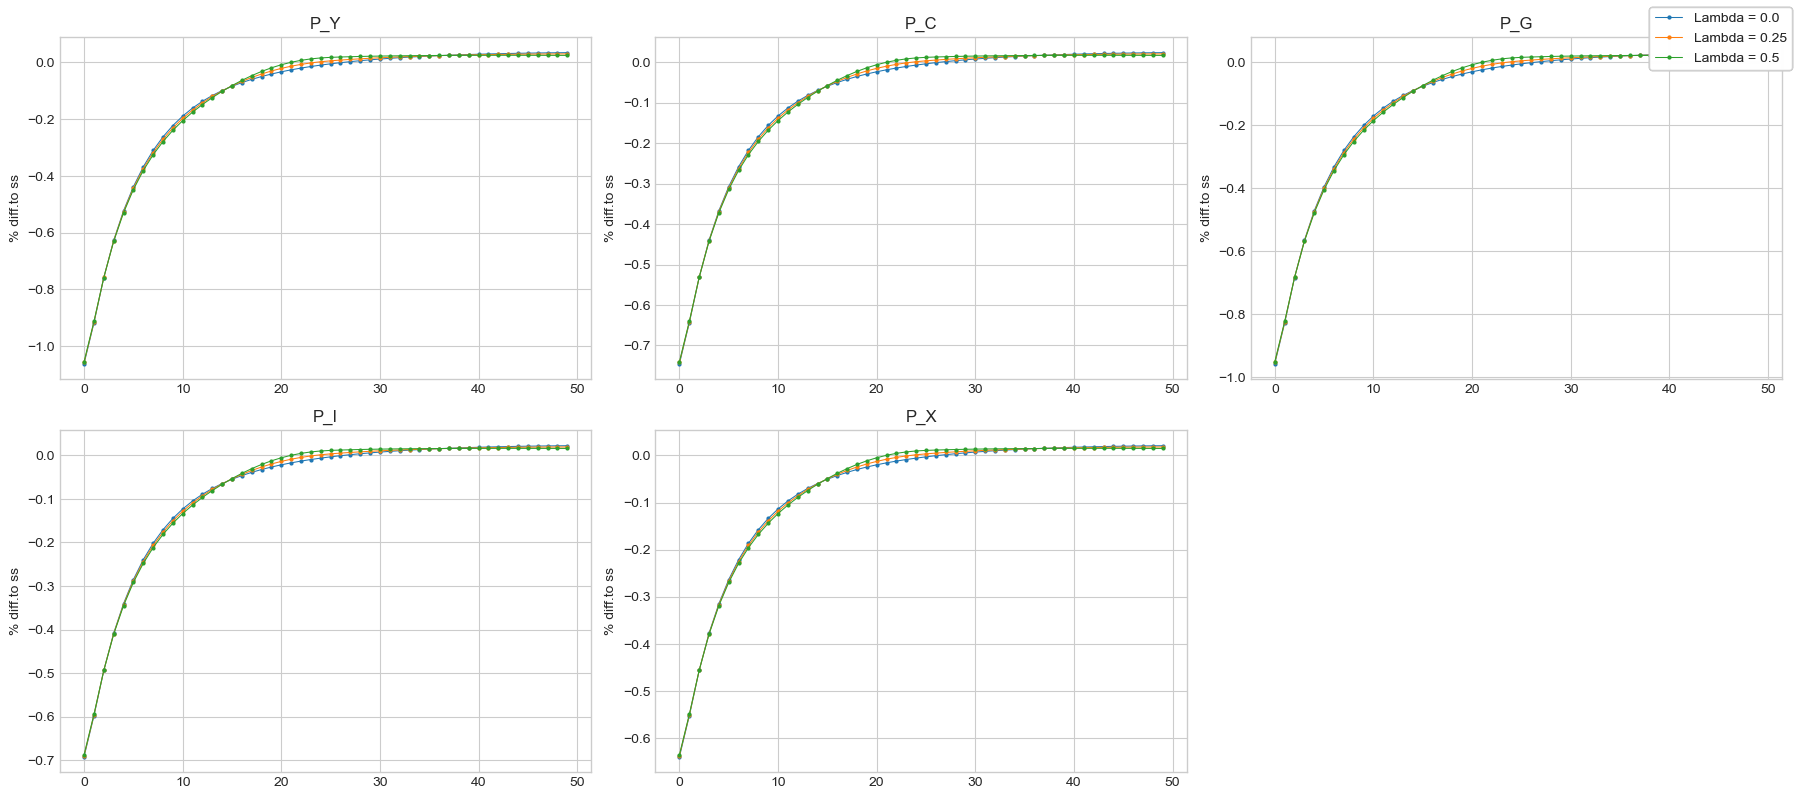

In [7]:
model.plot_IRF_models(ModelList,varlist=['P_Y','P_C','P_G','P_I','P_X'],parameter=parameter,parvalues=parvalues)

### Labor market

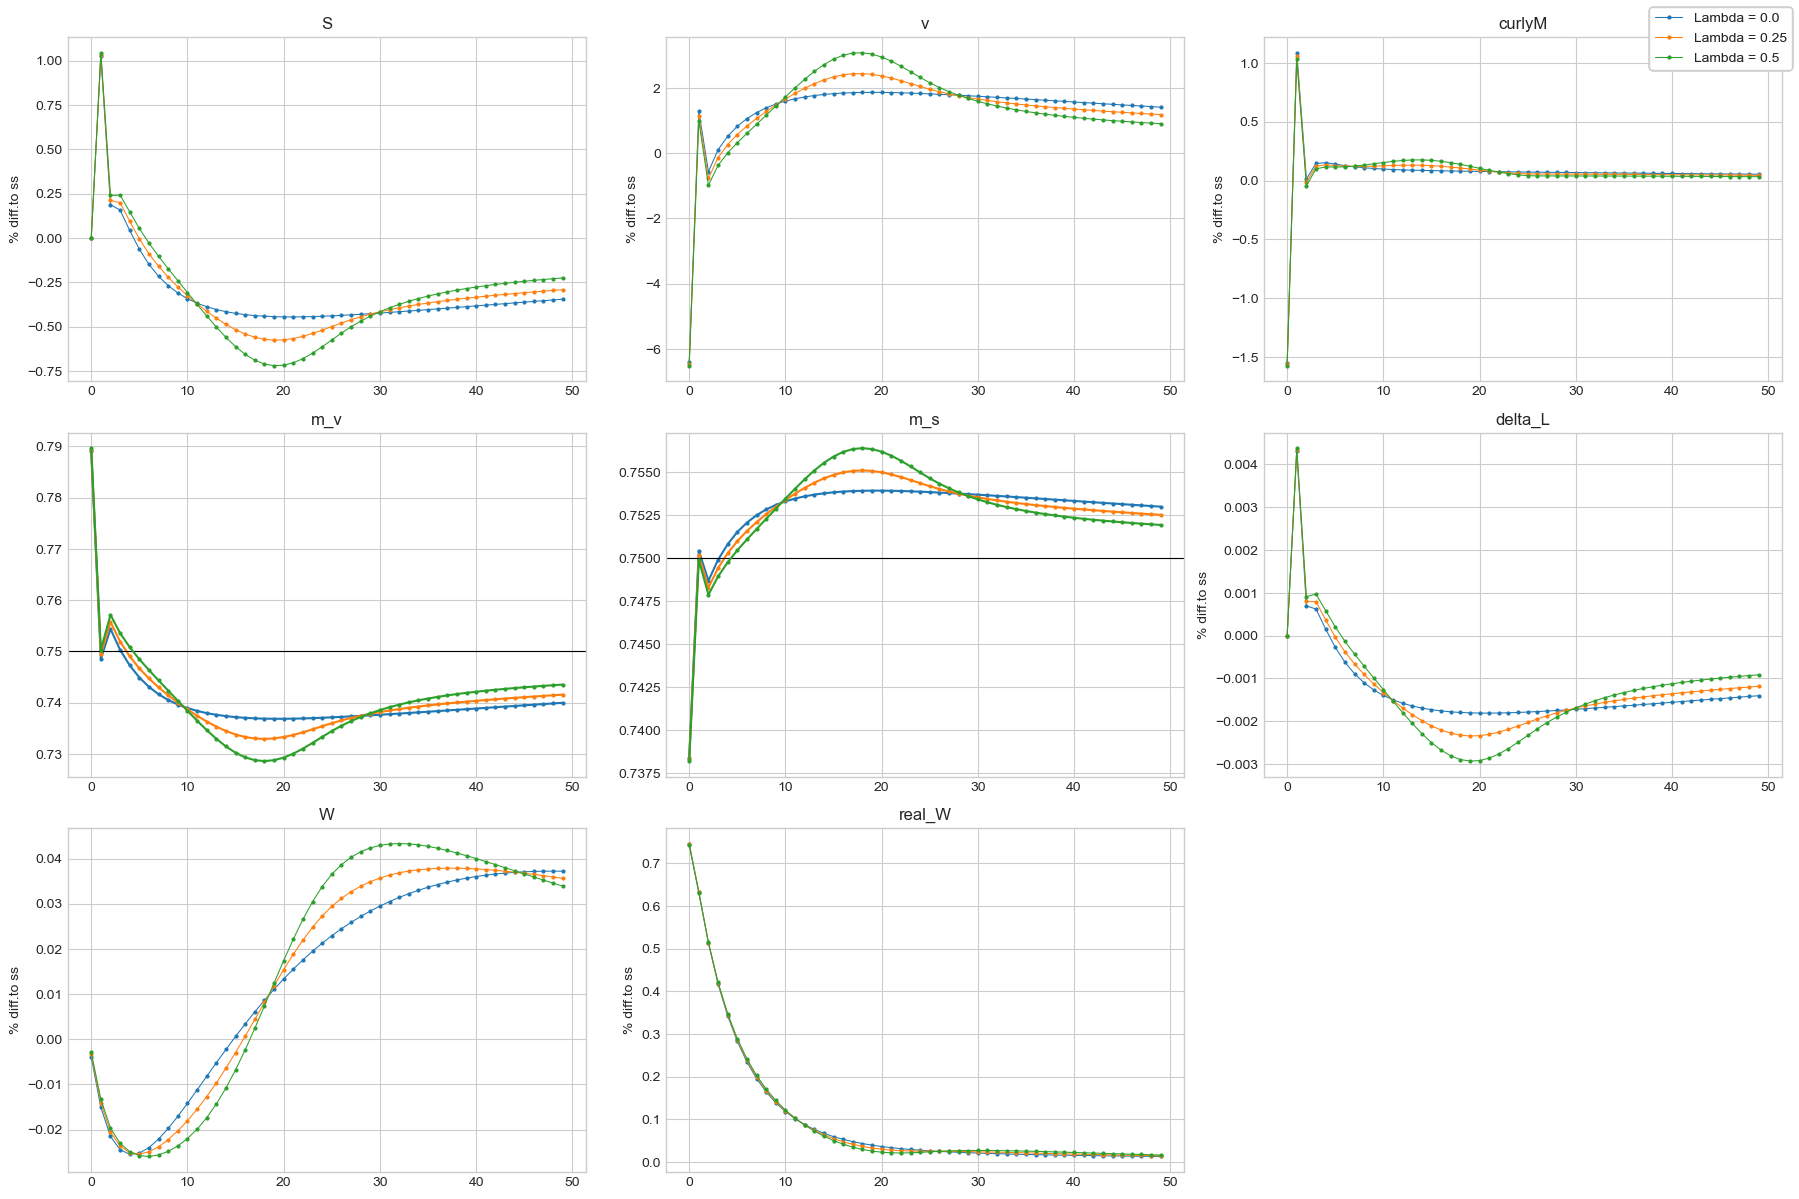

In [8]:
model.plot_IRF_models(ModelList,varlist=['S','v','curlyM','m_v','m_s','delta_L','W','real_W'],abs=['m_v','m_s'],parameter=parameter,parvalues=parvalues)

### Capital accumulation

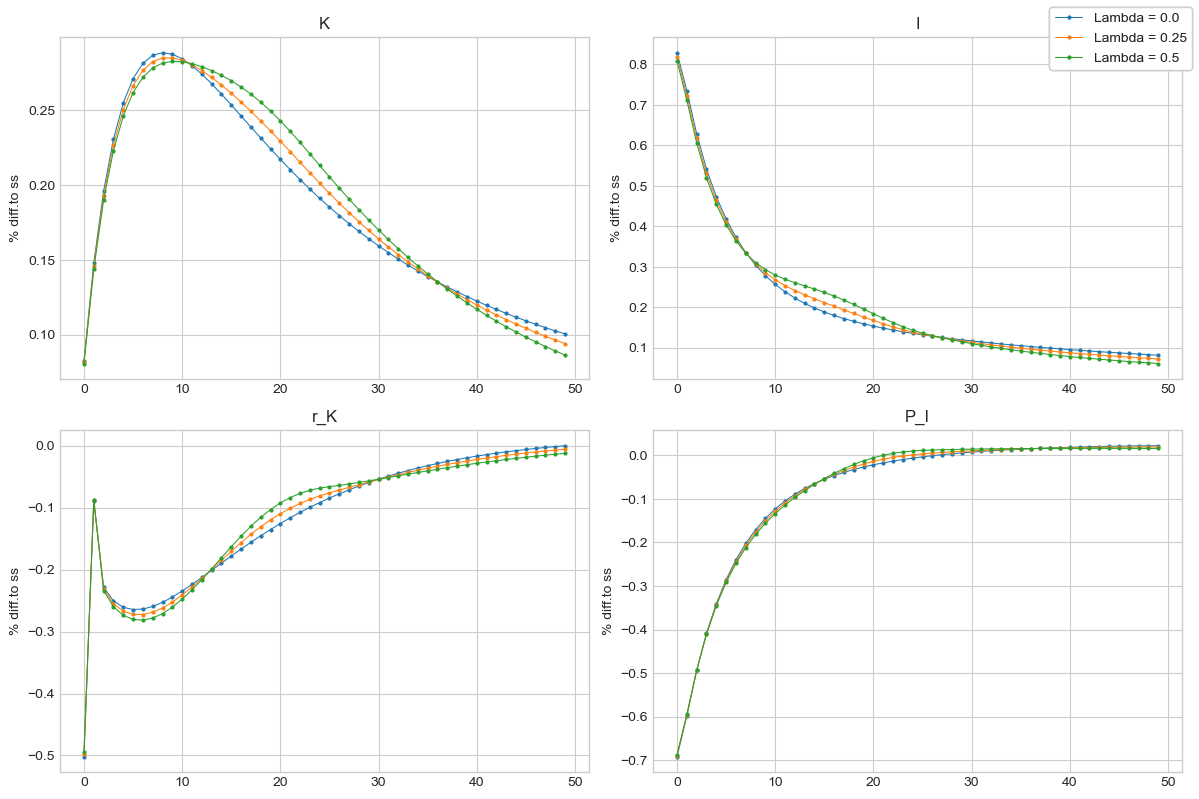

In [9]:
model.plot_IRF_models(ModelList,varlist=['K','I','r_K','P_I'],ncol=2,parameter=parameter,parvalues=parvalues)

### Production firms

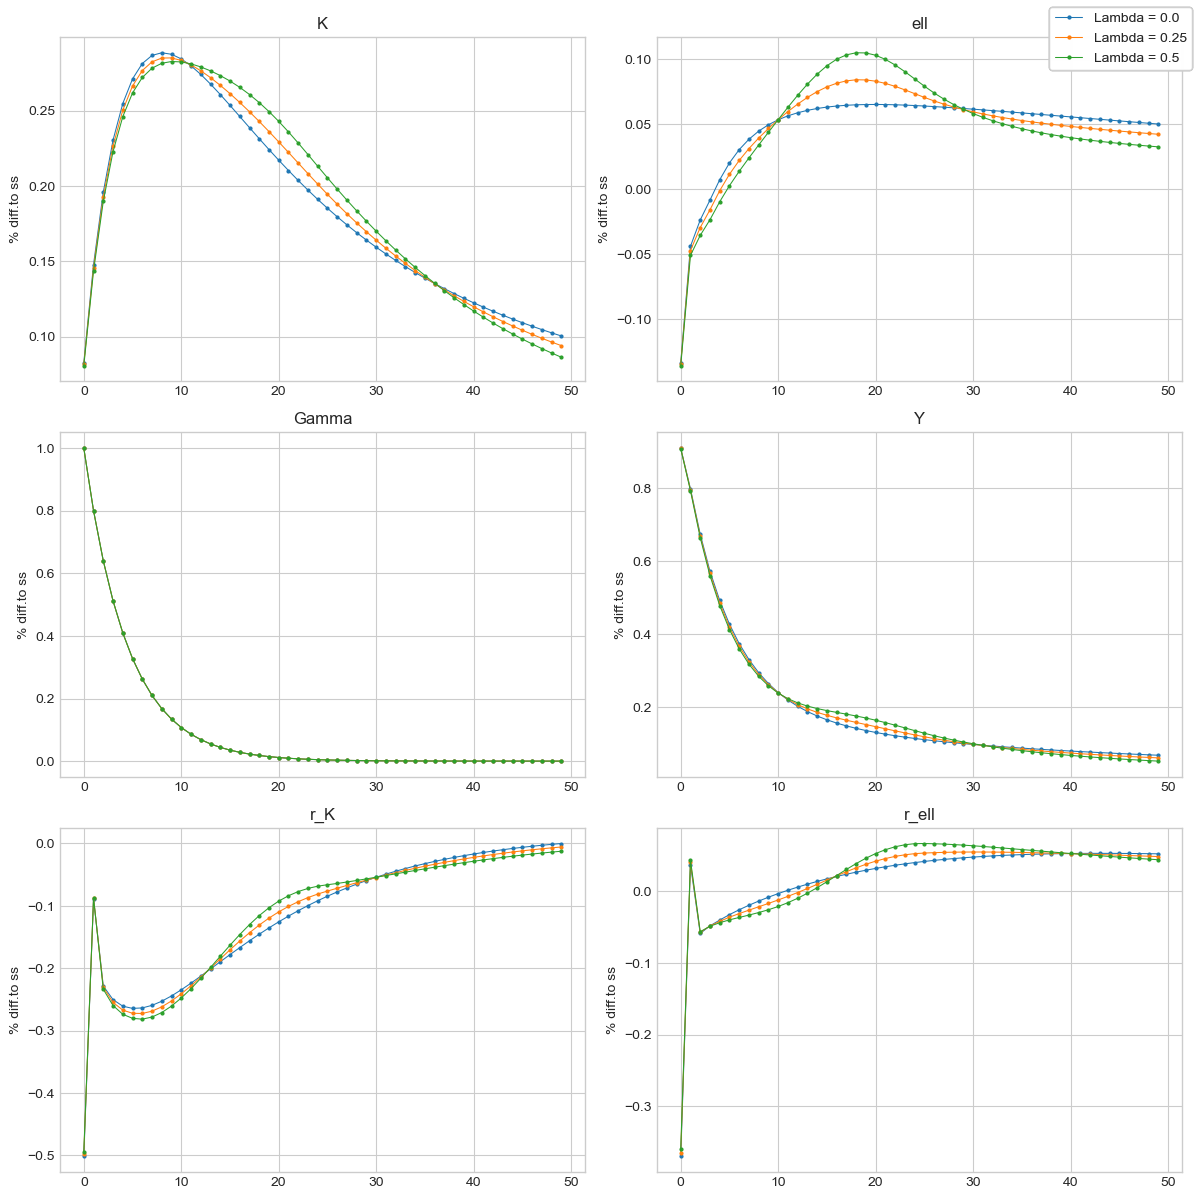

In [10]:
model.plot_IRF_models(ModelList,varlist=['K','ell','Gamma','Y','r_K','r_ell'],ncol=2,parameter=parameter,parvalues=parvalues)

### Phillips curve

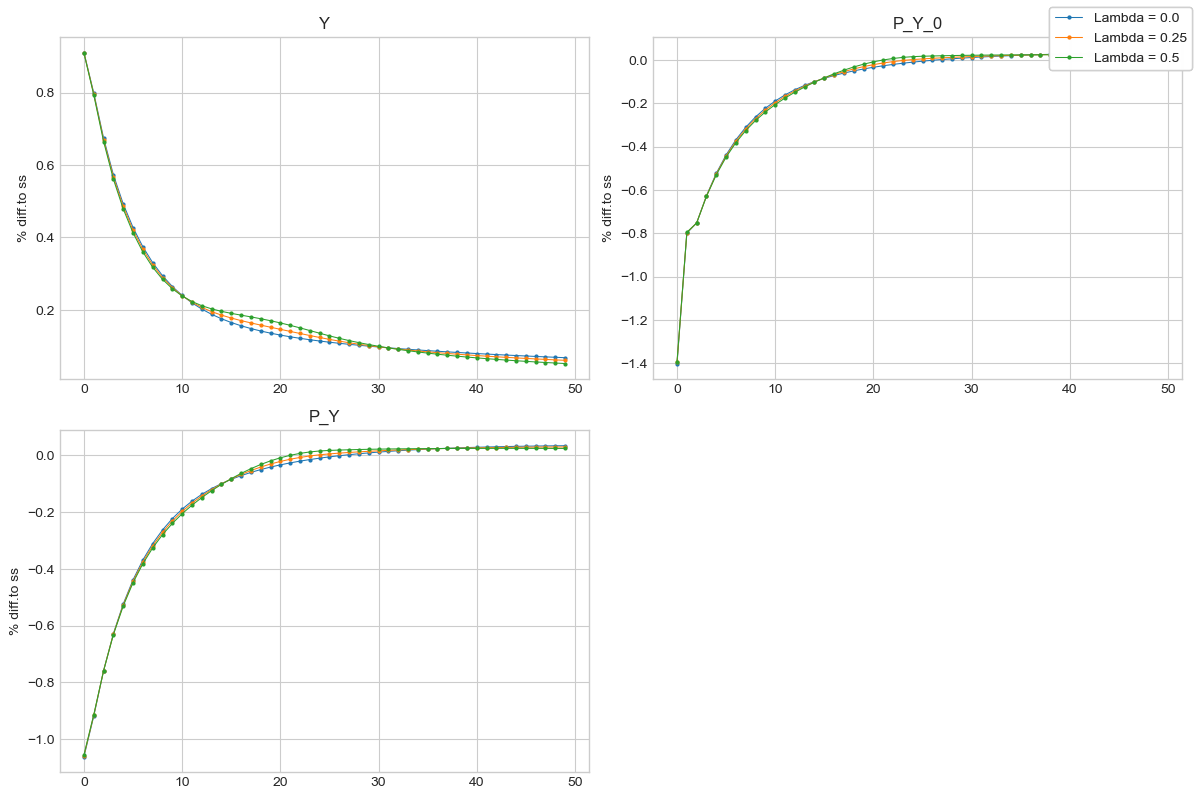

In [11]:
model.plot_IRF_models(ModelList,varlist=['Y','P_Y_0','P_Y'],ncol=2,parameter=parameter,parvalues=parvalues)

### Government

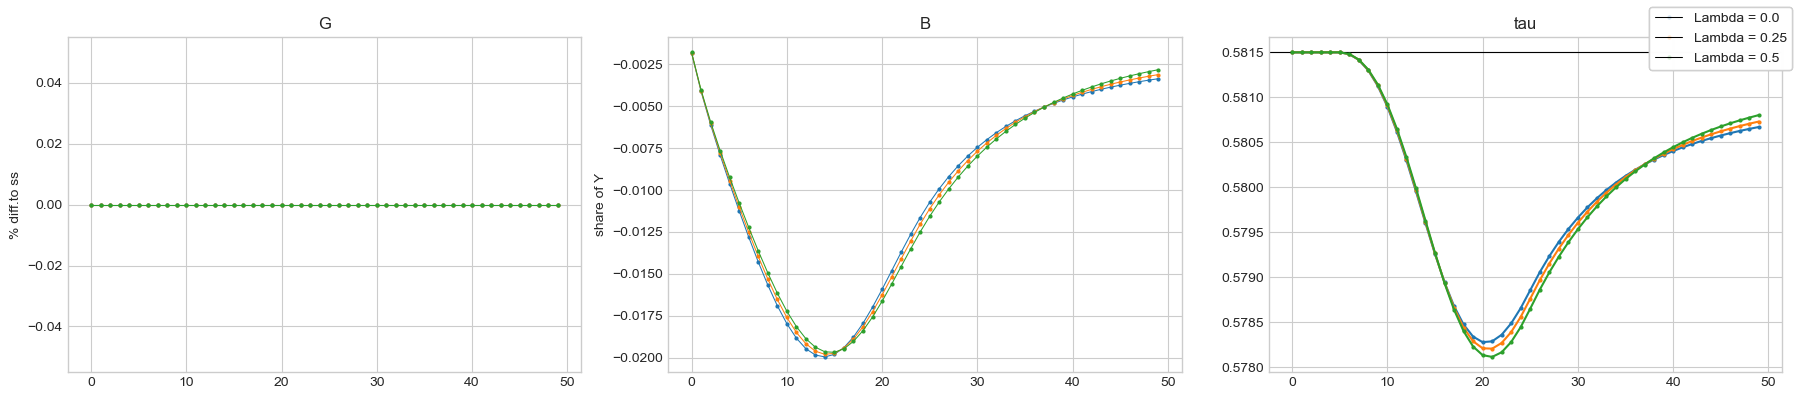

In [12]:
model.plot_IRF_models(ModelList,varlist=['G','B','tau'],abs=['tau'],Y_share=['B'],parameter=parameter,parvalues=parvalues)

### Households - aggregate

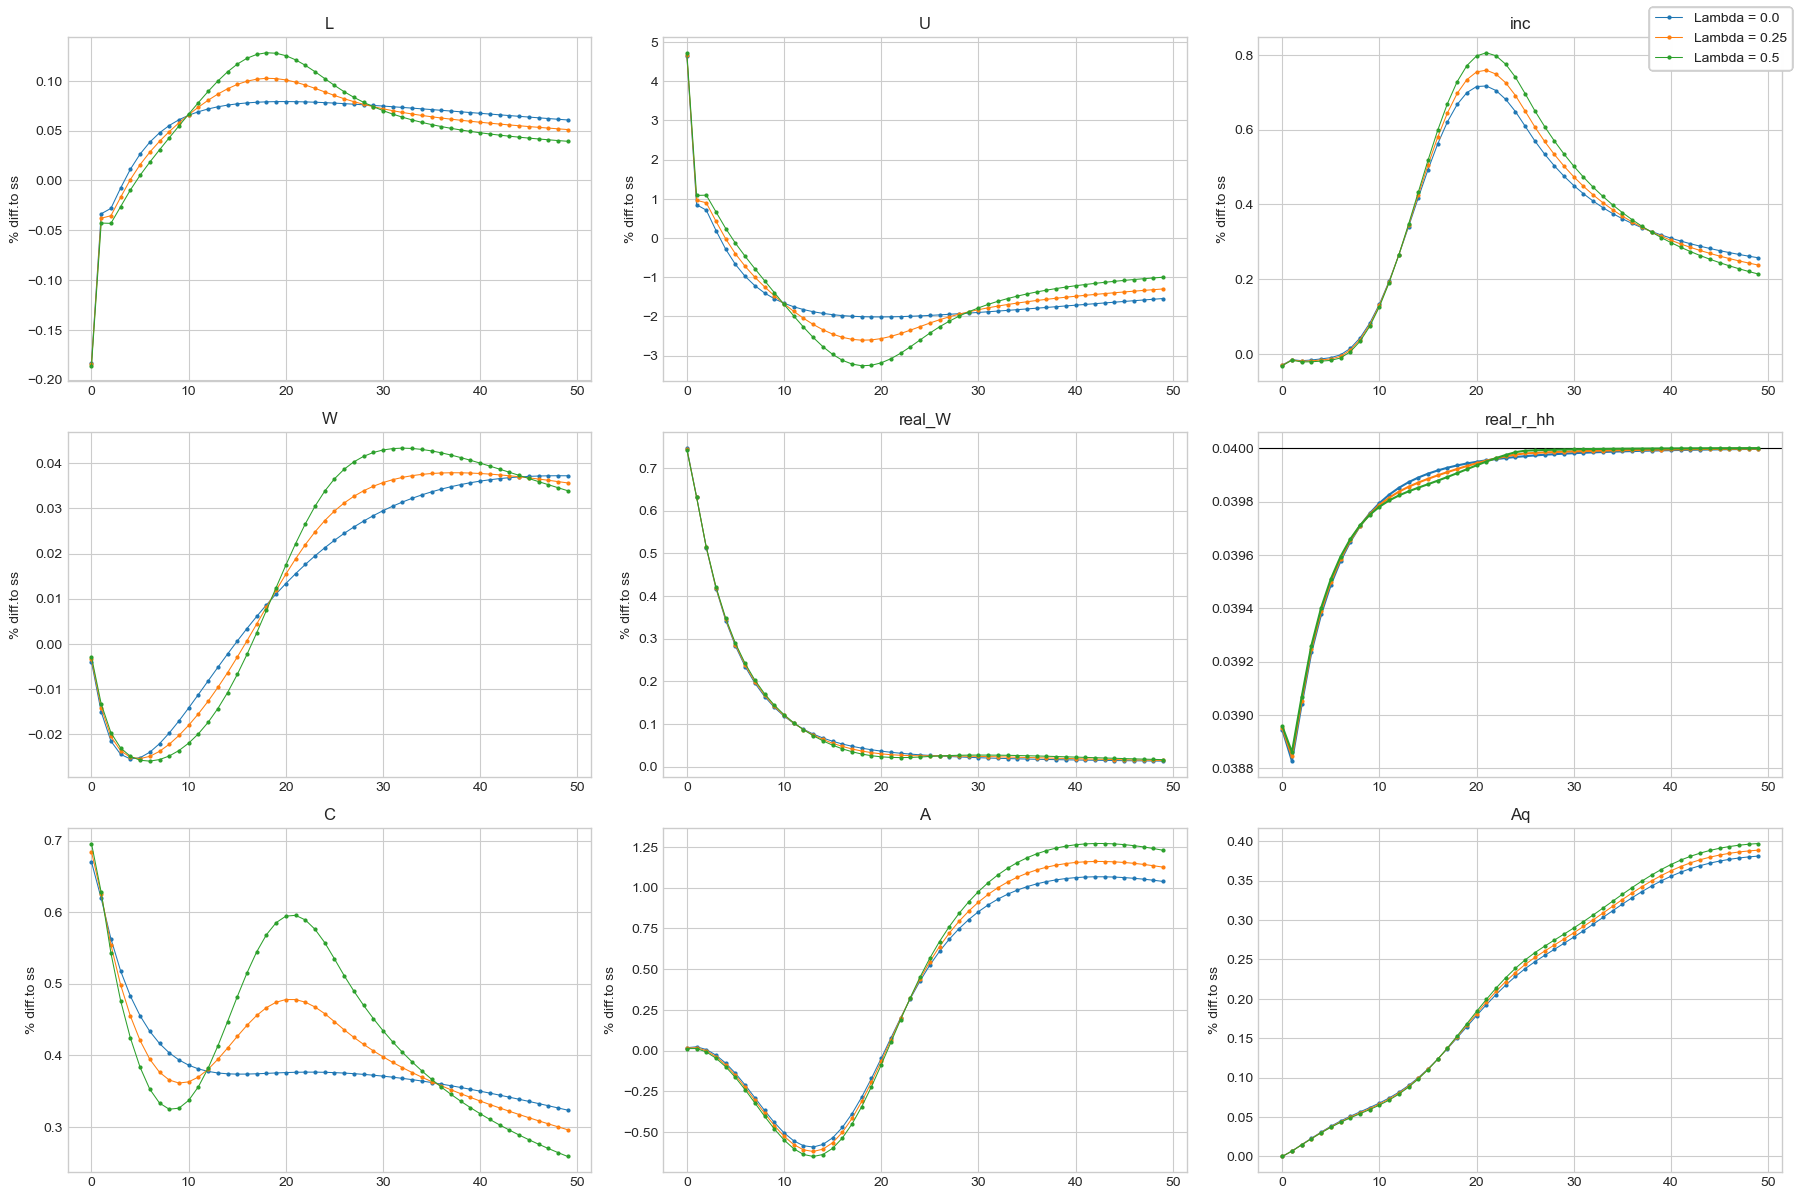

In [13]:
model.plot_IRF_models(ModelList,varlist=['L','U','inc','W','real_W','real_r_hh','C','A','Aq'],abs=['real_r_hh'],parameter=parameter,parvalues=parvalues)

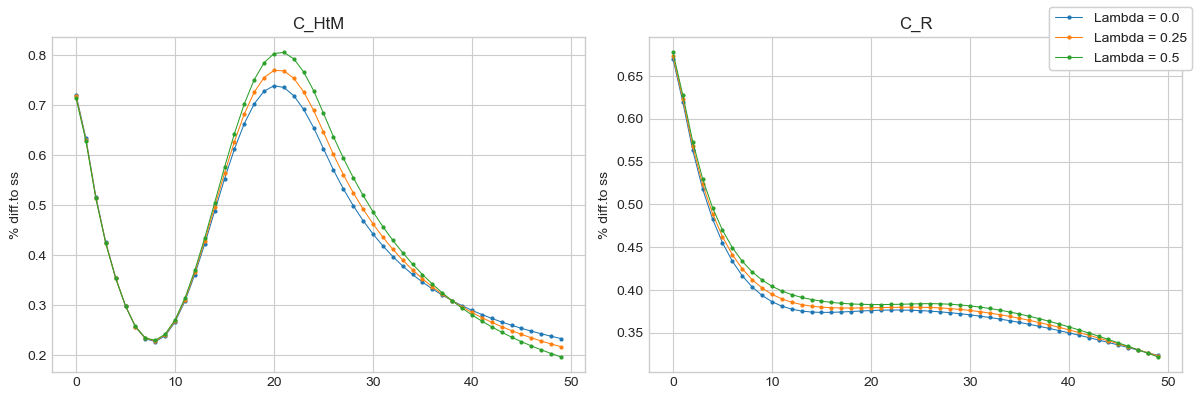

In [14]:
model.plot_IRF_models(ModelList,varlist=['C_HtM','C_R'],ncol=2,parameter=parameter,parvalues=parvalues)

### Households - life-cycle

In [15]:
model.plot_IRF_models(ModelList,varlist=['L_a','inc_a','C_a','A_a'],t0_list=[-20,-10,0,10,20],parameter=parameter,parvalues=parvalues)

TypeError: plot_IRF_models() got an unexpected keyword argument 't0_list'